## Data_Visualization_EIS.ipynb
#### Analyzes EIS Data from Big Kahuna for Convenient Feedback.
##### Miles Smith
##### 19 September 2023

In [4]:
import glob
import os
import math
import matplotlib.pyplot as plt
import numpy as np

### Read in all file names in EIS folder ###

# Specify the directory path and file extension pattern
# directory_path = '/Users/milessmith/Desktop/EIS/' # Miles MacBook Pro (for testing)
directory_path = 'C:\EIS' # Unchained Labs computer
extension_pattern = '*.txt'  # List .txt files, for example

# Get a list of file names matching the pattern in the directory
path_names = glob.glob(os.path.join(directory_path, extension_pattern))

### Select files of interest ###

'''
Example File structure: 103965_5_20230918_073125_25.txt
Plate Number: 103965
Vial Number (?): 5
Date: 20230918
Vial Code (?): 073125
Temperature (degC): 25
'''

### NOTICE: The underscores are an important aspect of the strings for temp and vial number. ###
# plate_number = '103965_'
plate_number = "skip"

vial_number = '_13_'
# vial_number = "skip"

date = '_20230918_'
# date = "skip"

# temperature = '_25'
temperature = "skip"

# New list to append the files of interest
useful_path = []


for path in path_names:
    if (date in path) or (date == "skip"):
        if (vial_number in path) or (vial_number == "skip"):
            if (temperature in path) or (temperature == "skip"):
                if (plate_number in path) or (plate_number == "skip"):
                    useful_path.append(path)
                else:
                    pass
            else:
                pass
        else:
            pass
    else:
        pass

print("Number of files selected: " + str(len(useful_path)))

Number of files selected: 3


In [5]:
'''
The text (.txt) does not include the frequency, so I am manually importing this from a .mpt file. 
If we adjust the frequency range, then we will need to adjust this, but from my observations we always sample
using the same frequencies. 
'''

# Note: Freq[Hz]
frequency = [ 6999984, 5969734, 5091109, 4341796, 3702781, 3157797, 2693047, 2296687, 1958656,1670375,
             1424531,1214875,1036062,883578.100000000,753531.200000000,642624.900000000,548046.800000000, 
             467390.600000000, 398593.700000000, 339937.500000000, 289906.200000000, 247234.400000000, 
             210843.700000000, 179812.500000000, 153343.800000000, 130781.200000000, 111531.300000000,  
             95109.3700000000, 81109.3700000000, 69171.8800000000, 59000, 50312.5000000000, 42906.2500000000, 
             36593.7500000000, 31203.1300000000, 26609.3800000000, 22703.1300000000, 19359.3700000000,  
             16500, 14112.0200000000, 12011.1300000000, 10236.3800000000, 8750.68400000000, 7449.46300000000, 
             6363.20600000000, 5414.76100000000, 4620.56700000000, 3941.21500000000, 3361.76900000000, 
             2867.24400000000, 2442.65800000000, 2083.00300000000, 1777.84300000000, 1513.54800000000, 
             1292.06500000000, 1101.76200000000, 939.101000000000, 801.280100000000, 684.343300000000, 
             582.947600000000, 497.067700000000, 423.508900000000, 361.503600000000, 308.126200000000, 
             262.729800000000, 224.211100000000, 191.285400000000, 163.172200000000, 139.153700000000, 
             118.670600000000, 101.198200000000, 86.2419600000000, 73.6102400000000, 62.6929100000000, 
             53.5769700000000, 45.6574600000000, 38.9651200000000, 33.1841400000000, 28.3061700000000, 
             24.1723700000000, 20.6134500000000, 17.5561800000000, 14.9855800000000, 12.7655300000000, 
             10.8809000000000, 9.27850500000000, 7.92339400000000, 6.75822000000000, 5.76142900000000, 
             4.91970800000000, 4.19125700000000, 3.56409700000000, 3.05175800000000, 2.60416400000000, 
             2.21442400000000, 1.89256700000000, 1.60750700000000, 1.37641300000000, 1.17375000000000, 
             1.00160400000000 ]

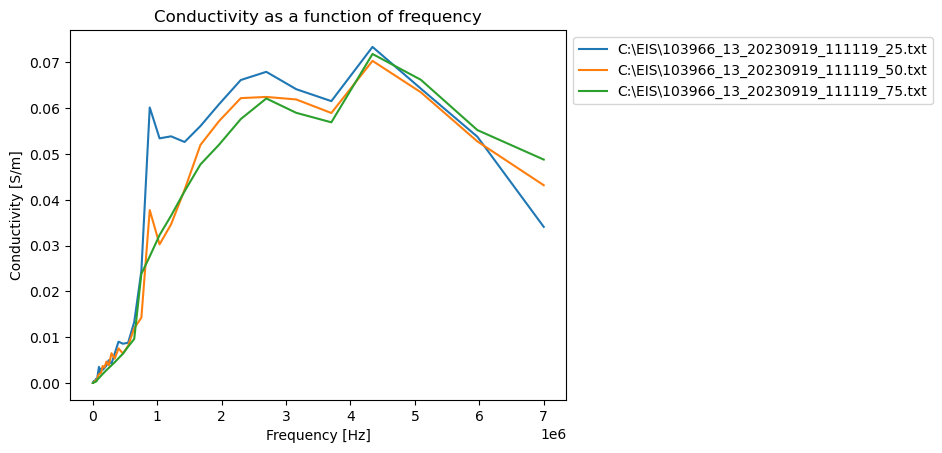

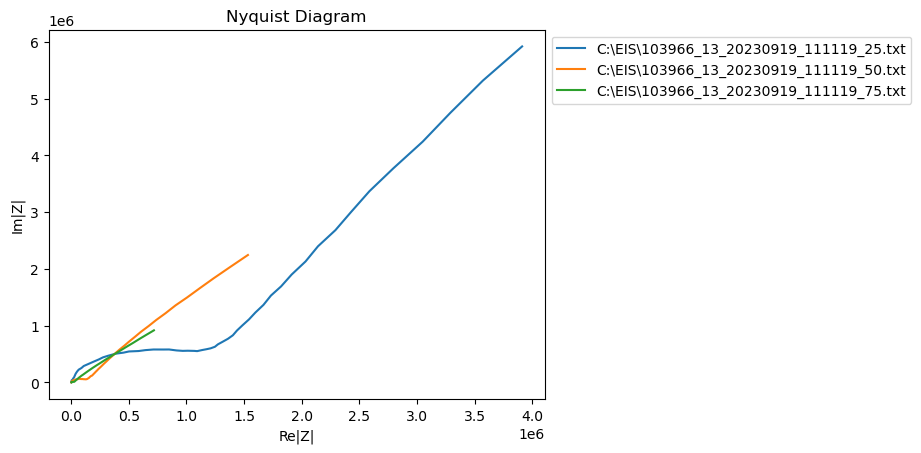

In [6]:
'''
Open and manage data from .txt files
'''
for path in useful_path: 
    # Open the file for reading
    with open(path, 'r') as file:
        ReZOhm = []
        ImZOhm = []
        conductivity = []
        i = 0
        for line in file:
            ZOhm_Values = line.split()
            ReZOhm.append(float(ZOhm_Values[0]))
            ImZOhm.append(float(ZOhm_Values[1]))
            
            # resistivity = resistance (ReZ) * area / length
            # where area = cross-sectional area, length = distance between electrodes
            diameter = 0.010 # [m] User-input required here
            length = 0.001 # [m] # User-input
            area = math.pi*diameter/4
            # Setting A and l to 1 makes this just conductance
            area = 1
            length = 1 
            resistivity = ReZOhm[i] * (area**2) / length
            conductivity.append(1/resistivity)
            i += 1
    
    '''
    Make figures 
    '''
    if len(frequency) == len(conductivity):
        plt.figure(1)
        plt.plot(frequency, conductivity, label = path)
        plt.title('Conductivity as a function of frequency')
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Conductivity [S/m]')
        plt.legend(bbox_to_anchor=(1, 1))
        # plt.ylim((0, 10))
        
        plt.figure(2)
        #plt.loglog(ReZOhm, ImZOhm, label = path) # I know this is unconventional, but it makes it easier to look at multiple lines.
        plt.plot(ReZOhm, ImZOhm, label = path) # I know this is unconventional, but it makes it easier to look at multiple lines.=
        plt.title('Nyquist Diagram')
        plt.xlabel('Re|Z|')
        plt.ylabel('Im|Z|')
        plt.legend(bbox_to_anchor=(1, 1))
        # plt.xlim((0, 250000))
        # plt.ylim((0, 100000))
    
    else:
        print("Dimensionality Error in file:" + path + "\nLength of Conductivity Array:" + str(len(conductivity)))
            
    
plt.show()